In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import djsetslow
import unionfind
import unionrank
import unionrankpc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 

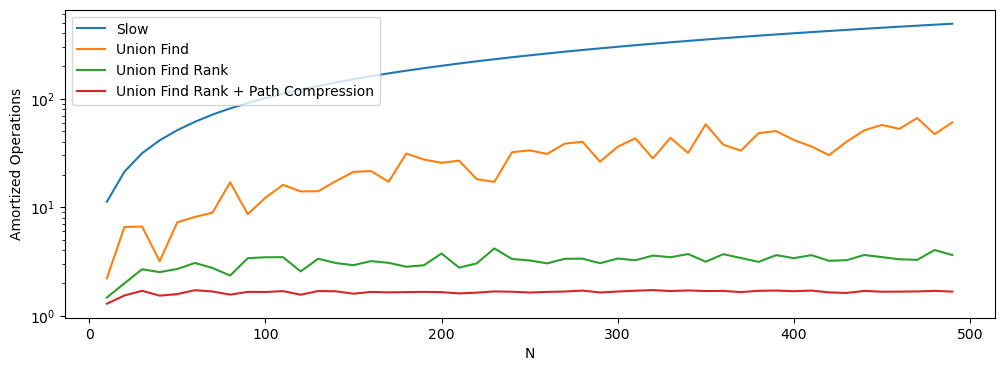

In [3]:
if __name__ == '__main__':
    Ns = np.arange(10, 500, 10)
    ops_djsetslow = np.zeros(Ns.size)
    ops_unionfind = np.zeros(Ns.size)
    ops_unionrank = np.zeros(Ns.size)
    ops_unionrankpc = np.zeros(Ns.size)
    #np.random.seed(5)

    for i, N in enumerate(Ns):
        print(N, end=' ', flush=True)
        s = djsetslow.SlowDisjointSet(N)
        u = unionfind.UnionFind(N)
        ur = unionrank.UnionFind(N)
        urpc = unionrankpc.UnionFind(N)
        # Choose a bunch of random pairs of indices and union them
        for k in range(N):
            i1 = np.random.randint(N)
            i2 = np.random.randint(N)
            s.union(i1, i2)
            u.union(i1, i2)
            ur.union(i1, i2)
            urpc.union(i1, i2)
        # Check to make sure the data structures agree
        for i1 in range(N):
            for i2 in range(i1+1, N):
                assert(s.find(i1, i2) == u.find(i1, i2))
                assert(u.find(i1, i2) == ur.find(i1, i2))
                assert(u.find(i1, i2) == urpc.find(i1, i2))
        # Record the number of operations
        ops_djsetslow[i] += s._operations / s._calls
        ops_unionfind[i] += u._operations / u._calls
        ops_unionrank[i] += ur._operations / ur._calls
        ops_unionrankpc[i] += urpc._operations / urpc._calls
    
    plt.figure(figsize=(12, 4))
    plt.plot(Ns, ops_djsetslow)
    plt.plot(Ns, ops_unionfind)
    plt.plot(Ns, ops_unionrank)
    plt.plot(Ns, ops_unionrankpc)
    plt.legend(["Slow", "Union Find", "Union Find Rank", "Union Find Rank + Path Compression"])
    plt.xlabel("N")
    plt.ylabel("Amortized Operations")
    plt.yscale("log")
    plt.show()
